# Hot_Dog Image Identification

## Specify the Model using ResNet50

In [61]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# num_classes is the number of categories 
num_classes = 2
resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.layers[0].trainable = False

## Compile the Model

In [62]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the Model

In [63]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator_with_aug = ImageDataGenerator(
                                              horizontal_flip = True,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2)

data_generator_no_aug = ImageDataGenerator()

train_generator = data_generator_with_aug.flow_from_directory(
        directory = "seefood/train",
        target_size=(image_size, image_size),
        batch_size=10,
        class_mode='categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
        directory = "seefood/val",
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        epochs =3,
        steps_per_epoch=10,
        validation_data=validation_generator,
        validation_steps=1)

Found 498 images belonging to 2 classes.
Found 189 images belonging to 2 classes.
Epoch 1/3
10/10 [==============================] - 99s 10s/step - loss: 0.8696 - acc: 0.5246 - val_loss: 0.6545 - val_acc: 0.5000
Epoch 2/3
10/10 [==============================] - 101s 10s/step - loss: 0.6491 - acc: 0.6500 - val_loss: 0.4771 - val_acc: 0.8125
Epoch 3/3
10/10 [==============================] - 98s 10s/step - loss: 0.6793 - acc: 0.6400 - val_loss: 0.4286 - val_acc: 0.7188


## Predict Test Data

In [64]:
test_generator = data_generator_no_aug.flow_from_directory(
        directory = "seefood/test",
        target_size=(image_size, image_size),
        shuffle = False,   # keep data in same order as labels
        class_mode='categorical')
pred_prob = my_new_model.predict_generator(test_generator)

Found 311 images belonging to 2 classes.


## Prediction Results

{'not_hot_dog': 1, 'hot_dog': 0}


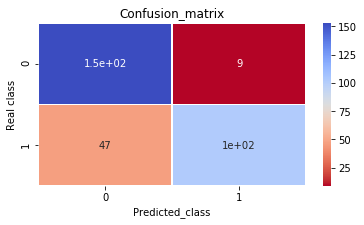

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(test_generator.class_indices)

y_actual = test_generator.classes

y_pred = list()
for i in range(0,len(pred_prob)):
    if pred_prob[i][0]<0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

#confusion_matrix(y_actual, y_pred)
model_matrix = confusion_matrix(y_actual, y_pred)
fig= plt.figure(figsize=(6,3))# to plot the graph
sns.heatmap(model_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()


## Predict new images

In [91]:
def img_class(classes):
    if classes == 0:
        print('hot_dog')
    else:
        print("not_hot_dog")

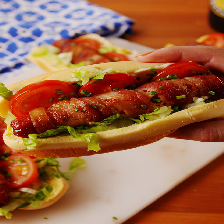

hot_dog


In [92]:
from tensorflow.python.keras.preprocessing import image
# predicting images
img = image.load_img('seefood/new_image/hotdog_1.jpg', target_size=(image_size, image_size))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = my_new_model.predict_classes(images, batch_size=10)
display(img)
img_class(classes)

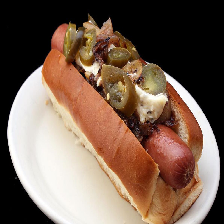

hot_dog


In [93]:
img = image.load_img('seefood/new_image/hotdog_2.jpg', target_size=(image_size, image_size))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = my_new_model.predict_classes(images, batch_size=10)
display(img)
img_class(classes)

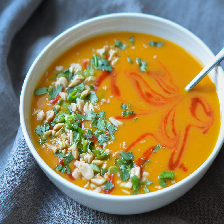

not_hot_dog


In [96]:
img = image.load_img('seefood/new_image/soup.jpg', target_size=(image_size, image_size))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = my_new_model.predict_classes(images, batch_size=10)
display(img)
img_class(classes)

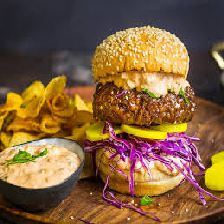

not_hot_dog


In [95]:
img = image.load_img('seefood/new_image/burger.jpg', target_size=(image_size, image_size))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = my_new_model.predict_classes(images, batch_size=10)
display(img)
img_class(classes)